# CAPM

Capital Asset Pricing Model (CAPM)

Market_Portfolio.xlsx contains monthly nominal (net) returns for the market portfolio (expressed as percentages, but without "%"), over the ten-year period from Jan 2004 through Dec 2013. Assume that the (net) risk-free rate is 0.13% per month.

Market Model

Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio.

Create a table showing the intercept and slope coefficients for the ten industry portfolios.

Briefly explain the economic significance of the intercept and slope coefficients.
Security Market Line (SML)

Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. This will give you the intercept and slope coefficients for the SML. (Warning: the results may be very different from what you would expect!)

Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.

Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.)

Briefly explain the economic significance of the SML.

### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

### Import and read file_path "Industry_Portolios.csv" and "Market_Portfolio.csv. Rename as per download file. Save the file in the same path as where this jupyter file is save.

### Process the mean return data to get the excess mean return

In [2]:
# Read csv path
industry_portfolio_file_path = "Industry_Portfolios.csv"
market_file_path = "Market_Portfolio.csv"

# Convert to pandas dataframe
data_frame_industry = pd.read_csv(industry_portfolio_file_path)
data_frame_market = pd.read_csv(market_file_path)

# Drop date column of market & industry mean return data frame for easier data manipulation
market_mean_return_df = data_frame_market.drop('Date', axis=1)
industry_mean_return_df = data_frame_industry.drop('Date', axis=1)

# Combine mean between market and industry mean return
combined_return_df = pd.concat([industry_mean_return_df,market_mean_return_df], axis=1)

# Calculate the mean of return on each portfolios
combined_monthly_mean_return = combined_return_df.mean()
combined_monthly_mean_return.values

# Extract industry portfolios name into numpy array
ten_industry_portfolios = industry_mean_return_df.columns.to_numpy()

# Calculate excess industry mean return. In this context, Rf = 0.13%. Adjust if necessary
risk_free_rate = 0.13
excess_industry_mean_return_df = industry_mean_return_df - risk_free_rate

# Calculate excess market mean return
excess_market_mean_return_df = market_mean_return_df - risk_free_rate


In [3]:
print("Industry Data Frame:")
print(data_frame_industry)

print("Market Data Frame:")
print(data_frame_market)

print("Market Mean Return Data Frame:")
print(market_mean_return_df)

print("Industry Mean Return Data Frame:")
print(industry_mean_return_df)

print("Combined mean return:")
print(combined_return_df)

print("Mean of combined return")
print(combined_monthly_mean_return)

print("Excess industry mean return")
print(excess_industry_mean_return_df)

print("Excess market mean return")
print(excess_market_mean_return_df)

Industry Data Frame:
       Date  NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  \
0    200401   0.06  -1.07  -0.62   0.44   4.53   1.41   0.45  3.09   1.92   
1    200402   4.25  -0.07   1.95   4.69  -2.92  -0.52   6.09  0.89   2.07   
2    200403  -0.09  -1.15  -0.27  -0.13  -2.55  -2.07   0.29 -3.96   1.13   
3    200404   1.42   2.30  -0.17   2.52  -4.91  -0.48  -2.70  3.54  -3.55   
4    200405  -1.89  -1.64   1.61   0.39   4.85  -2.95   0.30 -0.42   1.28   
..      ...    ...    ...    ...    ...    ...    ...    ...   ...    ...   
115  201308  -4.00  -1.00  -1.95  -1.83  -0.12  -3.28  -4.21 -3.49  -4.43   
116  201309   1.94   6.46   5.20   2.03   3.77   4.33   4.46  4.19   1.05   
117  201310   4.75   0.72   4.56   4.86   3.80   5.52   5.08  3.47   3.35   
118  201311   1.29   1.81   2.95   0.85   3.65   0.27   3.67  4.54  -1.81   
119  201312   2.65   1.18   3.13   2.95   4.04   3.96   0.20  0.71   1.79   

     Other  
0     2.88  
1     2.16  
2    -0.63  
3 

## Perform linear regression of excess industry portfolio returns with excess market portfolio as what shown in slide 18 to get alpha and beta for each portfolio

In [4]:
# list to store alpha and beta values for each portfolio
alpha_list = []
beta_list = []

# Iterate through the industry portfolio (columns)

for industry_portfolio in excess_industry_mean_return_df.columns:
    # Extract the industry portfolio returns
    industry_returns = excess_industry_mean_return_df[industry_portfolio]
    # Add a constant to intercepet (α)
    X = sm.add_constant(excess_market_mean_return_df)
    # Perform linear regression
    model = sm.OLS(industry_returns, X).fit()
    # Get α (alpha) and β (beta)
    alpha = model.params['const']
    beta = model.params[excess_market_mean_return_df.columns[0]]
    # Append results to the list
    alpha_list.append(alpha)
    beta_list.append(beta)
    
# Create a DataFrame to display the results
results_df = pd.DataFrame({
        'Industry': ten_industry_portfolios,
        'Intercept (α)': alpha_list,
        'Slope coefficients (β)': beta_list})

results_df.style.hide_index()


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_31153/1846362815.py:27: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  results_df.style.hide_index()


Industry,Intercept (α),Slope coefficients (β)
NoDur,0.369443,0.652647
Durbl,-0.415599,1.648536
Manuf,0.159771,1.169846
Enrgy,0.501719,0.969850
HiTec,-0.064020,1.132969
Telcm,0.194691,0.900729
Shops,0.275492,0.826492
Hlth,0.237841,0.673036
Utils,0.444585,0.538086
Other,-0.387135,1.207309


## Create Data frame combining slope coefficient (Beta) and portfolio mean return (inclde Market). Add beta for market portfolio equal to 1

In [5]:
beta_df = results_df[["Industry","Slope coefficients (β)"]]
# Add a new row with "Industry" set to "market" and "Slope coefficients (β)" set to 1
new_row = pd.DataFrame({'Industry': ['Market'], 'Slope coefficients (β)': [1.0]})
# Concatenate the new row to the original DataFrame
beta_mean_df = pd.concat([beta_df,new_row], ignore_index=True)
beta_mean_df['Mean Return'] = combined_monthly_mean_return.values

beta_mean_df

,Industry,Slope coefficients (β),Mean Return
0,NoDur,0.652647,0.902833
1,Durbl,1.648536,0.733333
2,Manuf,1.169846,1.012833
3,Enrgy,0.969850,1.231167
4,HiTec,1.132969,0.766250
5,Telcm,0.900729,0.881417
6,Shops,0.826492,0.916333
7,Hlth,0.673036,0.783833
8,Utils,0.538086,0.907167
9,Other,1.207309,0.489083


## Now that we have representative beta and mean return of each portfolio, perform linear regression to get the global alpha and beta

In [6]:
# Perform linear regression
X = sm.add_constant(beta_mean_df['Slope coefficients (β)'])
Y = beta_mean_df['Mean Return']
regression_model = sm.OLS(Y,
                          X).fit()

# Get intercept (α) and slope (β) coefficients
alpha_X = regression_model.params[0]
beta_X = regression_model.params[1]


combined_beta_array = np.array(beta_mean_df['Slope coefficients (β)'])
combined_mean_array = combined_monthly_mean_return.values

## Build graph for Security Market Line (SML)

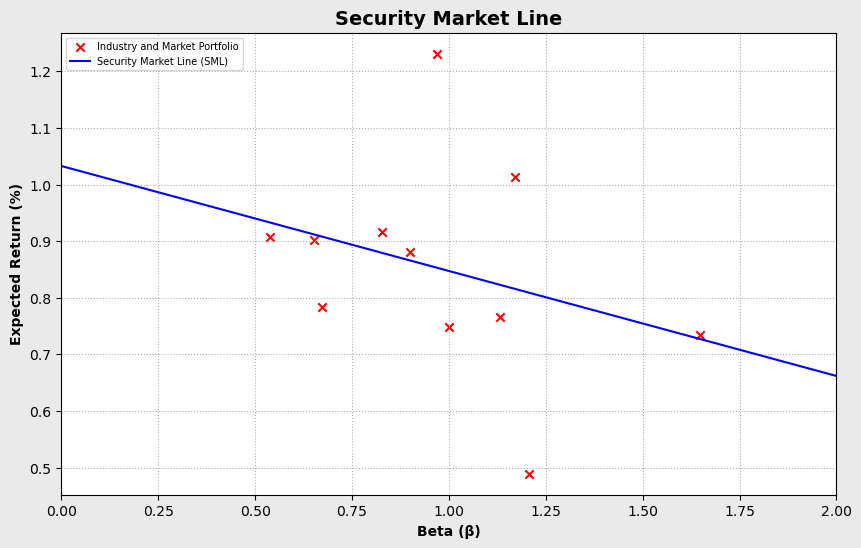

In [7]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter (combined_beta_array, combined_mean_array, marker = 'x', color = 'red', label = 'Industry and Market Portfolio')
fig = plt.gcf()
fig.set_facecolor('#EAEAEA')

# Add labels and a title
plt.xlabel('Beta (β)', fontsize=10, fontweight='bold')
plt.ylabel('Expected Return (%)',fontsize='10', fontweight='bold')

# Plot the linear regression line
x = np.linspace(0,2,100)
y = alpha_X + beta_X * x

plt.plot(x, y, label='Security Market Line (SML)', color='blue')

# Set the x-axis view range limit
plt.xlim(0, 2)

plt.grid(True, linestyle='dotted')
plt.legend(loc='upper left', fontsize='7')
plt.title("Security Market Line", fontsize=14, fontweight='bold')
plt.show()


# Economic significance:

### Intercept coefficient from market model regression shows pricing error relative to CAPM.

### Slope coefficient from market model regression shows degree of exposure to market risk.

### SML shows that all appropriately-priced assets have same Treynor ratio ⇒ assets that lie above SML are underpriced, while assets that lie below SML are overpriced.